In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import math

In [6]:
t_step = 0.001
t_max = 5
t = np.arange(0, t_max, t_step)

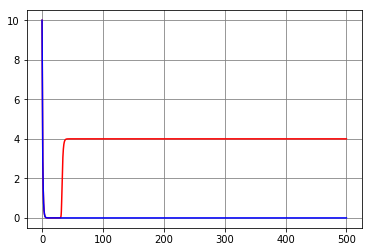

In [25]:
# Ex.
init_b = 10.0
init_a = 10.001
init_c = 0.0
init_d = 0.0
init_state = [init_a, init_b, init_c, init_d]
exo_a = exo_b = 1.0
exo_c = exo_d = 1.2
t1 = [5.0, 1.0, 100.0]
t2 = [5.0, 1.0, 100.0]
t3 = [100.0, 1.0, 0.0]
t4 = [100.0, 1.0, 0.0]

def model1(state, t):
    dadt = t1[0] * state[0] / (t1[1] + state[0] + t1[2] * state[3]) - exo_a * state[0]
    dbdt = t2[0] * state[1] / (t2[1] + state[1] + t2[2] * state[2]) - exo_b * state[1]
    dcdt = t3[0] * state[0] / (t3[1] + state[0]) - exo_c * state[2]
    dddt = t4[0] * state[1] / (t4[1] + state[1]) - exo_d * state[3]
    return [dadt, dbdt, dcdt, dddt]

result1 = odeint(model1, init_state, t)
plt.plot(t, result1[:,0], label='A', color='red')
plt.plot(t, result1[:,1], label='B', color='blue')
plt.grid(which='major',color='gray',linestyle='-')

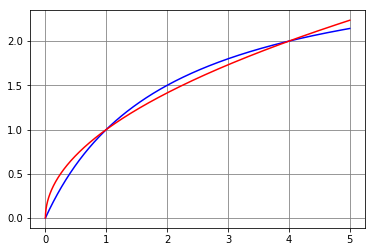

In [42]:
# H.W.
init_b = 1.0
init_a = 0.0
init_i = 0.0
init_state = [init_a, init_b, init_i]
reala1 = 100.0
realb1 = 50.0
realc1 = 12.0
a2 = 100.0
realb2 = 50.0
exo_i = 1.0

def f(a,b1,b2,c1):
    exo = reala1 / (b1 + 1 + c1 * a2 / (b2 * exo_i))
    return 1 / exo * reala1 * a / (b1 + (1 + c1 * a2 / (b2 * exo_i)) * a) # B

b_result = [f(a,realb1,realb2,realc1) for a in t]
theory = [math.sqrt(a) for a in t]
#result1 = odeint(model1, init_state, t)
plt.plot(t, b_result, label='B', color='blue')
plt.plot(t, theory, label='theory', color='red')
plt.grid(which='major',color='gray',linestyle='-')

In [12]:
from scipy.optimize import curve_fit 

In [13]:
np.random.seed(1729)

In [38]:
popt, pov = curve_fit(f,t,theory)

In [39]:
print(popt)

[ 1.68809494  2.2406184  -0.00292946]


In [16]:
print(pov)

[[inf inf]
 [inf inf]]


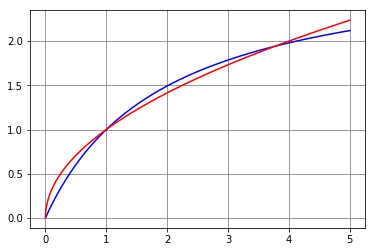

In [37]:
b_result = [f(a,popt[0],popt[1],popt[2]) for a in t]
theory = [math.sqrt(a) for a in t]
#result1 = odeint(model1, init_state, t)
plt.plot(t, b_result, label='B', color='blue')
plt.plot(t, theory, label='theory', color='red')
plt.grid(which='major',color='gray',linestyle='-')